##### Today we are going to apply what we learned in math till now in our Dimensionality Reduction Process throught Feature Selection using Principal Component Analysis

### Importing relevant libraries 

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Loading dataset

In [3]:
data = pd.read_csv("California_Real_Estate.csv", sep=";") # and here we used seperator to make it easy on reading features
df_real_estate = data.copy()
df_real_estate

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1
...,...,...,...,...,...,...,...,...
262,5,NaN,NaN,0,NaN,1239,322611,0
263,5,NaN,NaN,0,NaN,795,279191,0
264,5,NaN,NaN,0,NaN,1013,287997,0
265,5,NaN,NaN,0,NaN,1075,365869,0


###### Now we will Drop the Null Values

In [9]:
# Here the null values is the unsold which represents 0 so we will keep the values that holding 1
df_real_estate_nonull = df_real_estate[df_real_estate['Status'] == 1]
df_real_estate_nonull

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1
...,...,...,...,...,...,...,...,...
191,1,2005.0,7.0,0,22.0,743,210745,1
192,1,2005.0,7.0,0,28.0,1160,331155,1
193,1,2005.0,7.0,0,34.0,626,204435,1
194,1,2005.0,7.0,0,37.0,756,189194,1


#### Standraizing the Data or Rescaling it

First we should ask ourselves why Standraizing Data is so important.?

Let's explore the data and look at first row ['Area', 'Price'] and compare it with the third row.
What we notice is the difference in price, let's substract the differnece 452.667 - 246.173 = 206.494,
And if we saw the difference in the Areas 1605 - 743 = 862.

The way the algorithm work will going to focus more on price as a variable without taking in context what value of each(area or price) represents,

That will result an error in the predictiong because, in PCA it will take price as dominant variable and that will not give us a different view from the initial dataset,
and that's exactly what we need from the algorithm to treat all components equally 

In [10]:
scaler = StandardScaler()
df_re_nonull_std = scaler.fit_transform(df_real_estate_nonull)
# Note; PCA will construct as many Pcs as the dimension if we didn't specify

In [11]:
pca = PCA() #that will make PCA take only 8 components
pca.fit_transform(df_re_nonull_std) #this will take the variance and std of our data and standraizing this into according to these metrics 


array([[-0.60734881,  1.31926442,  0.57906783, ..., -0.25542486,
         0.2337479 ,  0.        ],
       [-0.58105774,  1.34289556,  0.32392824, ..., -0.18273758,
         0.199292  ,  0.        ],
       [-1.8398805 , -0.1606641 , -0.29157809, ..., -0.71379278,
         0.2905317 ,  0.        ],
       ...,
       [-1.03970034,  1.18485044, -0.6530342 , ..., -0.00559872,
         0.19757116,  0.        ],
       [-0.76196533,  1.19268984, -0.64690188, ..., -0.00744995,
        -0.28604396,  0.        ],
       [-0.82936359,  1.09937408, -0.7236547 , ..., -0.01692015,
         0.20697981,  0.        ]])

#### Now we are going to analyze variants captured by each principal component.
##### And then will chose a subset of these which captures an affairins but contains less than 8 components
##### to chose how many components we are going to use we first will at the variants and each corresponding principal component carries on its own and for that we will use .explained  

In [13]:
pca.explained_variance_ratio_ # will return number of variants and note that it will decrease as the index increases

array([0.30724715, 0.28117078, 0.15166089, 0.12851171, 0.09233419,
       0.03075947, 0.00831583, 0.        ])

#### Let's explore it more by visualizing it

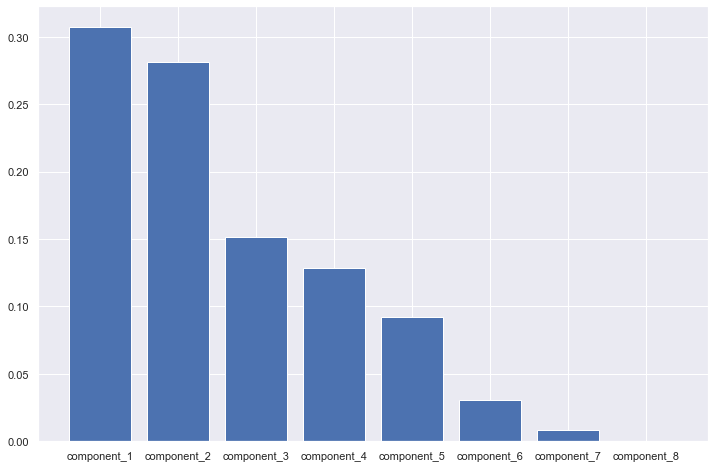

In [23]:
plt.figure(figsize = (12, 8))
components = ['component_1', 'component_2', 'component_3', 'component_4',
              'component_5', 'component_6', 'component_7', 'component_8']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title=("Explained Variance by Principal Components")
plt.xlabel =['Principal Components']
plt.ylabel = ['Explained Variance Ratio']
plt.show()

#### For further more analysis let's create a new plot showing the cummlative variance

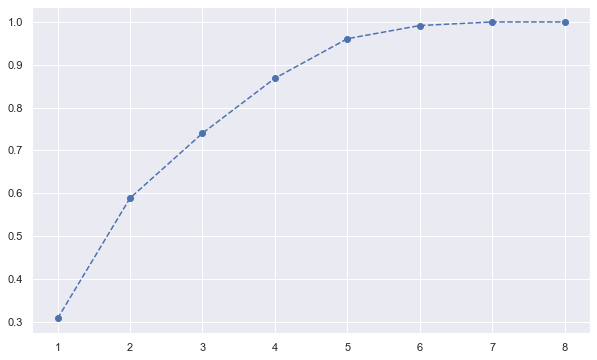

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(),marker="o",linestyle='--')
plt.title=("Explained Variance by Components")
plt.xlabel =['Number of Components']
plt.ylabel = ['Explained Cummulative Variance']
plt.show()

In the above figure shows how many components we need to obtain 80% or above of the variance the answer we take 4 components to make more than 80%

## PCA Covariance Matrix - Analysis and Interpretation
#### Now we should analyze our results
Here comes the role of CoVariance Matrixit's very important to analyze the PCA results
The EigenVectors of CoVariance Matrix are Principal Components
To find it then we need to solve the eigenvectors/eigenvalue problem

In [31]:
pca = PCA(n_components=4) # targeting the components to equal 4

In [32]:
pca.fit(df_re_nonull_std) 

PCA(n_components=4)

In [33]:
pca.components_

array([[-0.01347829,  0.06534594, -0.06689355, -0.15099905,  0.39492744,
         0.63949973,  0.63509464,  0.        ],
       [-0.61576753, -0.62980998, -0.02208123,  0.4114363 , -0.15693164,
         0.12506318,  0.11888648, -0.        ],
       [ 0.2675697 , -0.06682334,  0.90927776,  0.22605443, -0.12937694,
         0.11386435,  0.1278709 ,  0.        ],
       [ 0.26715037,  0.33315704, -0.3274807 ,  0.55432795, -0.56219835,
         0.20000856,  0.21689532,  0.        ]])

In [34]:
# in order interpret more easier we will create df pca 
df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns=df_real_estate.columns.values,
                           index=['component_1', 'component_2', 'component_3', 'component_4'])
df_pca_comp

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
component_1,-0.013478,0.065346,-0.066894,-0.150999,0.394927,0.639500,0.635095,0.0
component_2,-0.615768,-0.629810,-0.022081,0.411436,-0.156932,0.125063,0.118886,-0.0
component_3,0.267570,-0.066823,0.909278,0.226054,-0.129377,0.113864,0.127871,0.0
component_4,0.267150,0.333157,-0.327481,0.554328,-0.562198,0.200009,0.216895,0.0


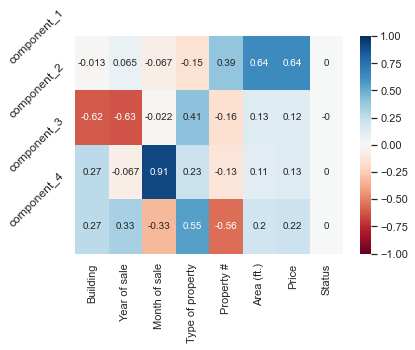

In [41]:
# lets visualize it with heatmap using seaborn
sns.heatmap(df_pca_comp,
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)

plt.yticks([0,1,2,3],
           ['component_1', 'component_2', 'component_3', 'component_4'],
           rotation=45,
           fontsize=12)
plt.show()

The Conclusion we can gather from the previous visualization is that.
comp_1 having a very high positive relation with price and area,
comp_2 having high negative relation with building and year_of_sale,
comp_3 having very high positive relation with month_of_sale,
comp_4 having positive relation with type_of_property and negative relation with property#.